### Elevation change drived by altimeter 


In [1]:
from utils.geotif_io import readTiff
import cartopy.feature as cfeature
from cartopy.io.shapereader import Reader
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from matplotlib.colors import LinearSegmentedColormap
import pandas as pd
import xarray as xr
import numpy as np

In [2]:
path_setp_vec = 'data/boundary/setp_zhao2022.gpkg'
path_dem = 'data/dem-data/srtm-c/SRTMGL3_900m.tif'
path_ele_change_isat1 = 'data/ele-change-result/ele_change_isat1_tiles_sub.nc'
path_ele_change_isat2 = 'data/ele-change-result/ele_change_isat2_tiles_sub.nc'
path_ele_change_cryo2 = 'data/ele-change-result/ele_change_cryo2_tiles_sub.nc'
path_ele_change_dems = 'data/ele-change-result/ele_change_dems_tiles_sub.nc'
path_ele_change_fused = 'data/ele-change-result/ele_change_fused_tiles_sub.nc'
# path_ele_change_dems_tiles = 'data/aster-stereo/ele_change_dems_tiles.nc'


In [3]:
dem, dem_info = readTiff(path_dem)
ele_change_isat1_xr = xr.open_dataset(path_ele_change_isat1)
ele_change_isat2_xr = xr.open_dataset(path_ele_change_isat2)
ele_change_cryo2_xr = xr.open_dataset(path_ele_change_cryo2)
ele_change_dems_xr = xr.open_dataset(path_ele_change_dems)
ele_change_fused_xr = xr.open_dataset(path_ele_change_fused)
# ele_change_dems_tiles_xr = xr.open_dataset(path_ele_change_dems_tiles)
ele_change_isat1_xr
ele_change_cryo2_xr
ele_change_dems_xr
ele_change_fused_xr


<xarray.Dataset>
Dimensions:                     (tiles_id: 112, years: 23)
Coordinates:
  * tiles_id                    (tiles_id) object 'tile_270_960' ... 'tile_31...
  * years                       (years) object '2000' '2001' ... '2021' '2022'
Data variables: (12/17)
    tiles_lat                   (tiles_id) int64 ...
    tiles_lon                   (tiles_id) int64 ...
    area_glacier_tiles          (tiles_id) float64 ...
    ele_change_setp             (years) float64 ...
    ele_change_tiles            (tiles_id, years) float64 ...
    rate_setp                   float64 ...
    ...                          ...
    rate_tiles                  (tiles_id) float64 ...
    rate_error_tiles            (tiles_id) float64 ...
    rate_2000_2012_tiles        (tiles_id) float64 ...
    rate_error_2000_2012_tiles  (tiles_id) float64 ...
    rate_2013_2022_tiles        (tiles_id) float64 ...
    rate_error_2013_2022_tiles  (tiles_id) float64 ...

### 1. Averaged elevation change.

In [4]:
print('Elevation change rate by aster dems: %f +/- %f' % (ele_change_dems_xr['rate_setp'], ele_change_dems_xr['rate_error_setp']))
print('Elevation change rate by icesat-1: %f +/- %f' % (ele_change_isat1_xr['rate_setp'], ele_change_isat1_xr['rate_error_setp']))
print('Elevation change rate by icesat-2: %f +/- %f' % (ele_change_isat2_xr['rate_setp'], ele_change_isat2_xr['rate_error_setp']))
print('Elevation change rate by cryosat-2: %f +/- %f' % (ele_change_cryo2_xr['rate_setp'], ele_change_cryo2_xr['rate_error_setp']))
print('Elevation change rate by multiple data fusion: %f +/- %f' % (ele_change_fused_xr['rate_setp'], ele_change_fused_xr['rate_error_setp']))


Elevation change rate by aster dems: -0.603805 +/- 0.296360
Elevation change rate by icesat-1: -1.179263 +/- 0.440122
Elevation change rate by icesat-2: -0.336730 +/- 0.117726
Elevation change rate by cryosat-2: -1.065336 +/- 0.108559
Elevation change rate by multiple data fusion: -0.709511 +/- 0.045893


#### Elevation change on setp glacier by multiple altimeters data.

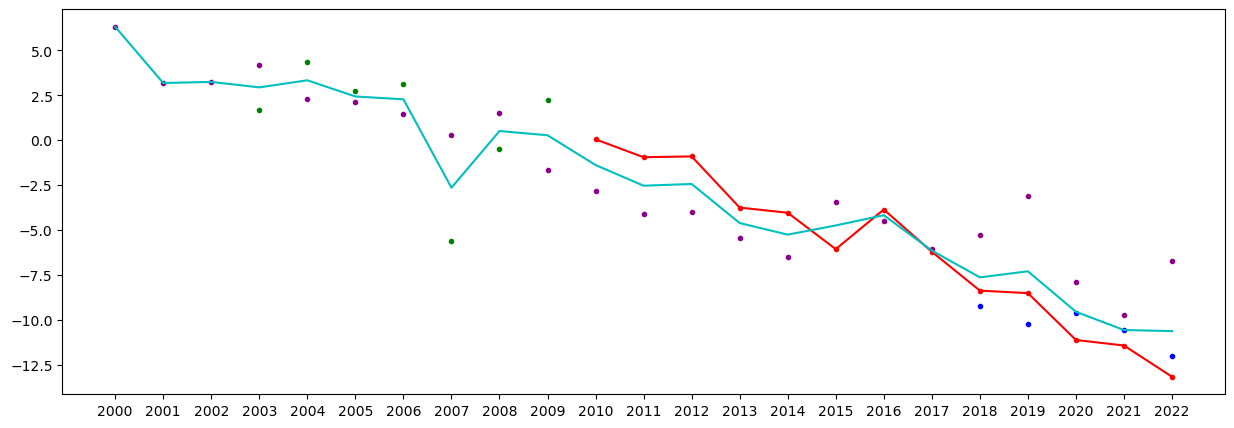

In [5]:
plt.figure(figsize=(15,5))
residual_fit_dems = abs(ele_change_dems_xr['ele_change_cor_setp'].values - ele_change_dems_xr['ele_change_cor_fitting_setp'].values)
residual_fit_isat1 = abs(ele_change_isat1_xr['ele_change_cor_setp'].values - ele_change_isat1_xr['ele_change_cor_fitting_setp'].values)
residual_fit_isat2 = abs(ele_change_isat2_xr['ele_change_cor_setp'].values - ele_change_isat2_xr['ele_change_cor_fitting_setp'].values)
residual_fit_cryo2 = abs(ele_change_cryo2_xr['ele_change_cor_setp'].values - ele_change_cryo2_xr['ele_change_cor_fitting_setp'].values)

#### dems
plt.plot(ele_change_dems_xr.years, ele_change_dems_xr['ele_change_cor_setp'], '.', color='DarkMagenta', label='elevation change by dems')   ### bin-based area weighting -> tile-based area weighting
# plt.plot(ele_change_dems_xr.years, ele_change_dems_xr['ele_change_cor_fitting_setp'], '-r', label='bins weighting and then tiles weighting')   ### bin-based area weighting -> tile-based area weighting
# plt.fill_between(ele_change_dems_xr.years, ele_change_dems_xr['ele_change_cor_setp'] - residual_fit_dems, \
#                  ele_change_dems_xr['ele_change_cor_setp'] + residual_fit_dems, color='DarkMagenta', alpha=0.3)

#### icesat-1
plt.plot(ele_change_isat1_xr.years, ele_change_isat1_xr['ele_change_cor_setp'], '.g', label='elevation change by icesat-1')   ### bin-based area weighting -> tile-based area weighting
# plt.plot(ele_change_isat1_xr.years, ele_change_isat1_xr['ele_change_cor_fitting_setp'], '-r', label='bins weighting and then tiles weighting')   ### bin-based area weighting -> tile-based area weighting
# plt.fill_between(ele_change_isat1_xr.years, ele_change_isat1_xr['ele_change_cor_setp'] - residual_fit_isat1, \
#                  ele_change_isat1_xr['ele_change_cor_setp'] + residual_fit_isat1, color='green', alpha=0.3)

#### icesat-2
plt.plot(ele_change_isat2_xr.years, ele_change_isat2_xr['ele_change_cor_setp'], '.b', label='elevation change by icesat-2')   ### bin-based area weighting -> tile-based area weighting
# plt.plot(ele_change_isat2_xr.years, ele_change_isat2_xr['ele_change_cor_fitting_setp'], '-r', label='bins weighting and then tiles weighting')   ### bin-based area weighting -> tile-based area weighting
# plt.fill_between(ele_change_isat2_xr.years, ele_change_isat2_xr['ele_change_cor_setp'] - residual_fit_isat2, \
#                  ele_change_isat2_xr['ele_change_cor_setp'] + residual_fit_isat2, color='b', alpha=0.3)

#### cryosat-2
plt.plot(ele_change_cryo2_xr.years, ele_change_cryo2_xr['ele_change_cor_setp'], '.-r', label='elevation change by cryosat-2')   ### bin-based area weighting -> tile-based area weighting
# plt.plot(ele_change_cryo2_xr.years, ele_change_cryo2_xr['ele_change_cor_fitting_setp'], '-r', label='bins weighting and then tiles weighting')   ### bin-based area weighting -> tile-based area weighting
# plt.fill_between(ele_change_cryo2_xr.years, ele_change_cryo2_xr['ele_change_cor_setp'] - residual_fit_cryo2, \
#                  ele_change_cryo2_xr['ele_change_cor_setp'] + residual_fit_cryo2, color='red', alpha=0.3)

#### weighted elevation changes
plt.plot(ele_change_fused_xr.years, ele_change_fused_xr['ele_change_setp'], '-c', label='elevation change by cryosat-2')   ### bin-based area weighting -> tile-based area weighting
# plt.plot(ele_change_dems_xr.years, ele_change_fitting, '.-r', label='elevation change by cryosat-2')   ### bin-based area weighting -> tile-based area weighting


### 2.Tile-based elevation change mapping

In [6]:
# Scatterplot
def scatterplot(x, y, size, color, color_range=[-1.5, -1, -0.5], cmap_dhdt=plt.cm.get_cmap('Reds').reversed(), color_min=-1.5, color_max=0):
  cmap_dem = LinearSegmentedColormap.from_list('linear color', ["DimGray", "white"])
  fig = plt.figure(figsize=(10,6))
  ax = fig.add_subplot(1, 1, 1, projection=ccrs.Mercator(central_longitude=88.5))
  ax.set_extent([91, 99, 27.3, 32])
  ax_dem = ax.imshow(dem, extent=dem_info['geoextent'], 
                                  vmin=3500, vmax=7000, cmap=cmap_dem, \
                                  transform=ccrs.PlateCarree(), zorder=0)   ## cmap:PRGn

  ## 1. Tibeteau southeast boundary
  shp_fea = cfeature.ShapelyFeature(Reader(path_setp_vec).geometries(), \
                        crs=ccrs.PlateCarree(), edgecolor='lightgreen', linewidth=1, facecolor='none')

  ax.add_feature(shp_fea, zorder=0)
  scatter = ax.scatter(
      # x = ele_change_xr['tiles_lon'].values/10+0.25, 
      # y = ele_change_xr['tiles_lat'].values/10+0.25, 
      # s = ele_change_xr['area_glacier_tiles'].values/1.5,
      # c = ele_change_xr['rate_tiles'].values,
      x = x,
      y = y,
      s = size,
      c = color,
      cmap=cmap_dhdt,
      alpha=1, 
      linewidth=2,
      vmin=color_min,
      vmax=color_max,
      transform=ccrs.PlateCarree(),
      )
  ax.gridlines(draw_labels=True, linewidth=1, alpha=1, zorder=1, color='grey', linestyle='--')

  # produce a legend with the unique colors from the scatter
  handles, labels = scatter.legend_elements(prop="colors", num=color_range)
  legend_color = ax.legend(handles, labels, loc="lower left", title="dh/dt",\
                              facecolor='white', edgecolor='black', borderpad=0.8, labelspacing=1.5, markerscale=2)

  # produce a legend with a cross-section of sizes from the scatter
  handles, labels = scatter.legend_elements(prop="sizes", num=[100, 300, 500], alpha=0.2)
  print(labels)
  legend_glacier_area = ax.legend(handles, [100, 300, 500], loc="lower left", title="Glacier Area", \
                                                  edgecolor='black', borderpad = 0.8, labelspacing=1.5, bbox_to_anchor=(0.15, 0.))

  ax.add_artist(legend_color)
  ax.add_artist(legend_glacier_area)
  return ax



### Dems derived scatterplot.

In [7]:
x_tiles_sub = ele_change_dems_xr['tiles_lon'].values/10+0.25 
y_tiles_sub = ele_change_dems_xr['tiles_lat'].values/10+0.25
size_tiles_sub = ele_change_dems_xr['area_glacier_tiles'].values/1.5
color_rate_tiles_sub_dems = ele_change_dems_xr['rate_tiles'].values
color_rate_tiles_sub_fused = ele_change_fused_xr['rate_tiles'].values
color_rate_tiles_sub_fused_2000_2012 = ele_change_fused_xr['rate_2000_2012_tiles'].values
color_rate_tiles_sub_fused_2013_2022 = ele_change_fused_xr['rate_2013_2022_tiles'].values


['$\\mathdefault{100}$', '$\\mathdefault{300}$', '$\\mathdefault{500}$']


Text(0.5, 1.0, 'elevation change during 2000-2022')

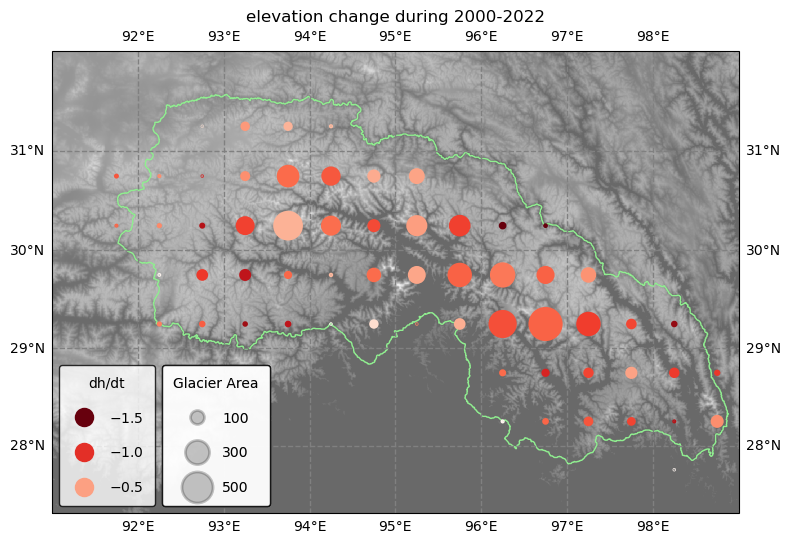

In [8]:
scatterplot(x=x_tiles_sub, y=y_tiles_sub, size=size_tiles_sub, color=color_rate_tiles_sub_fused, color_range=[-1.5, -1, -0.5])
plt.title('elevation change during 2000-2022')


['$\\mathdefault{100}$', '$\\mathdefault{300}$', '$\\mathdefault{500}$']


Text(0.5, 1.0, 'elevation change during 2000-2012')

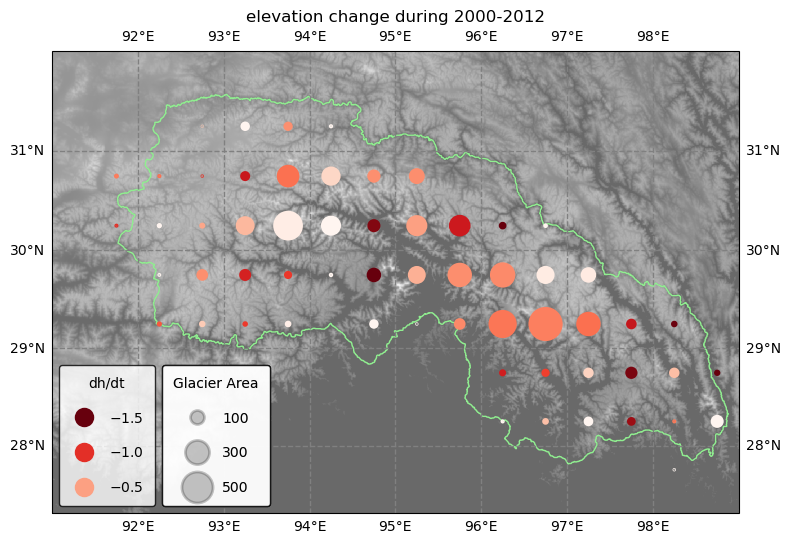

In [9]:
scatterplot(x=x_tiles_sub, y=y_tiles_sub, size=size_tiles_sub, color=color_rate_tiles_sub_fused_2000_2012)
plt.title('elevation change during 2000-2012')


['$\\mathdefault{100}$', '$\\mathdefault{300}$', '$\\mathdefault{500}$']


Text(0.5, 1.0, 'elevation change during 2013-2022')

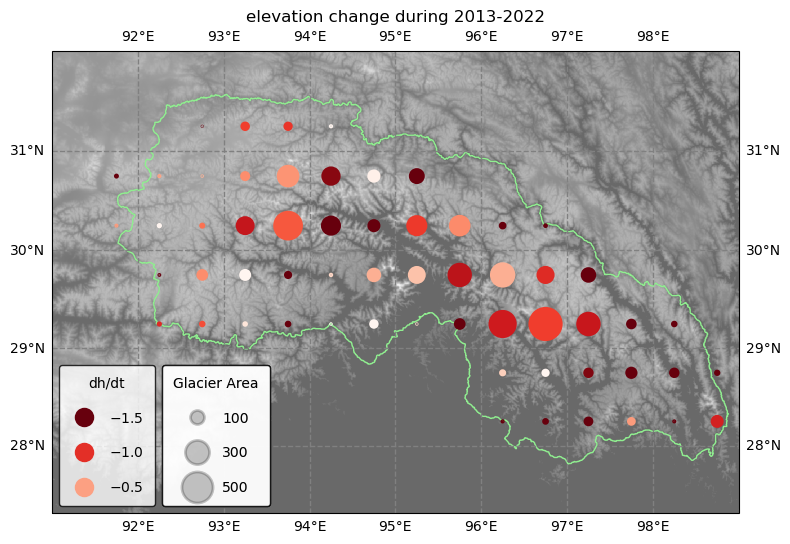

In [10]:
scatterplot(x=x_tiles_sub, y=y_tiles_sub, size=size_tiles_sub, color=color_rate_tiles_sub_fused_2013_2022)
plt.title('elevation change during 2013-2022')


### Elevation change rate during 2000-2022 vs. 2013-2022


In [11]:
color_rate_dif_tiles_sub = color_rate_tiles_sub_fused_2013_2022 - color_rate_tiles_sub_fused


['$\\mathdefault{100}$', '$\\mathdefault{300}$', '$\\mathdefault{500}$']


Text(0.5, 1.0, 'difference of elevation change rates')

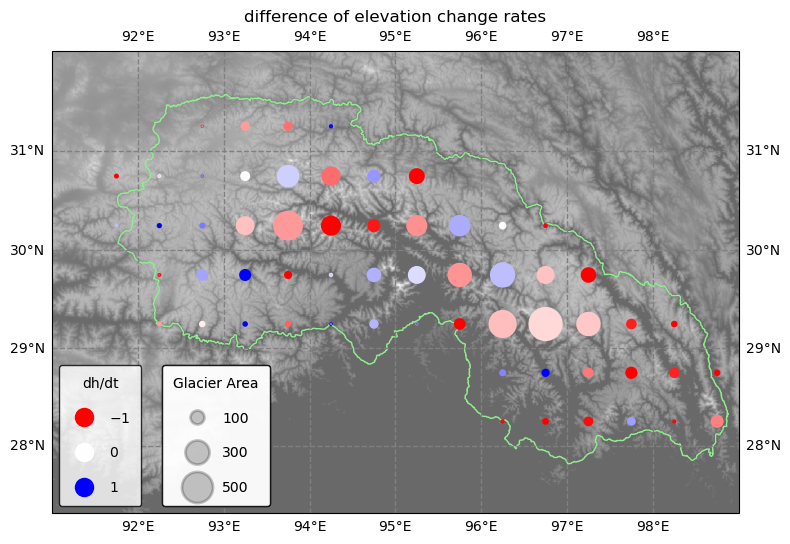

In [12]:
scatterplot(x=x_tiles_sub, y=y_tiles_sub, size=size_tiles_sub, color=color_rate_dif_tiles_sub, \
                                              color_range=[-1, 0, 1], color_min=-1, color_max=1, cmap_dhdt=plt.cm.get_cmap('bwr').reversed())
plt.title('difference of elevation change rates')

  


### Bin-based elevation change mapping


In [34]:
ele_change_dems_xr['area_glacier_bins']

<xarray.DataArray 'area_glacier_bins' (bins_id: 50)>
array([4.302000e-01, 7.956000e-01, 1.095300e+00, 1.471500e+00, 2.080800e+00,
       2.002500e+00, 3.368700e+00, 4.494600e+00, 5.573700e+00, 8.403300e+00,
       1.038240e+01, 1.355670e+01, 1.895490e+01, 2.666340e+01, 4.206240e+01,
       5.551920e+01, 6.775650e+01, 9.222660e+01, 1.270863e+02, 1.772280e+02,
       2.444103e+02, 3.173895e+02, 3.746457e+02, 4.152726e+02, 4.607793e+02,
       4.997547e+02, 5.512149e+02, 5.988294e+02, 6.423804e+02, 5.560785e+02,
       3.433248e+02, 1.852398e+02, 1.147185e+02, 7.903980e+01, 5.585670e+01,
       3.751740e+01, 2.626740e+01, 1.724490e+01, 1.082070e+01, 7.054200e+00,
       5.046300e+00, 3.656700e+00, 2.288700e+00, 1.599300e+00, 6.975000e-01,
       3.645000e-01, 2.241000e-01, 3.870000e-02, 0.000000e+00, 0.000000e+00])
Coordinates:
  * bins_id  (bins_id) object '2500-2600' '2600-2700' ... '7400-7500'

Text(0.5, 1.0, 'elevation change rate of bins by dems')

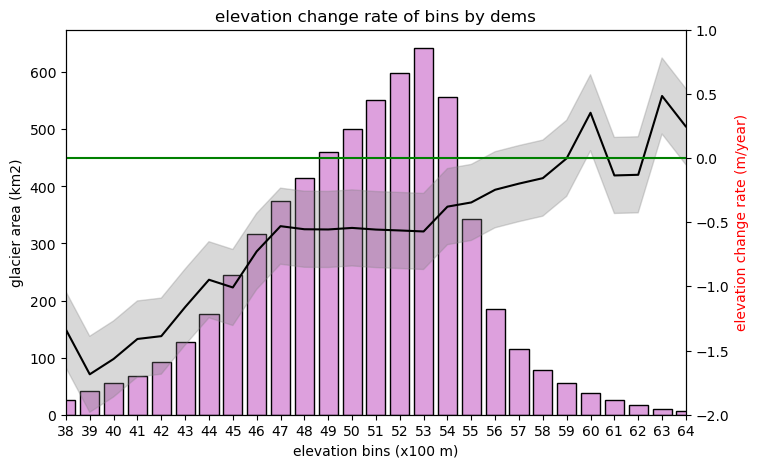

In [37]:
bins_id = ele_change_dems_xr['bins_id'].values
bins_id_start = [bin_id[0:2] for bin_id in bins_id]
fig = plt.figure(figsize=(8, 5))
ax1 = fig.add_subplot(111)      # Create matplotlib axes
ax1.bar(bins_id_start, ele_change_dems_xr['area_glacier_bins'], color ='Plum', edgecolor ='black')
ax1.set_ylabel('glacier area (km2)')
ax1.set_xlabel('elevation bins (x100 m)')
ax2 = ax1.twinx() # Create another axes that shares the same x-axis as ax.
ax2.set_ylabel('elevation change rate (m/year)', color='red')
ax2.plot(bins_id_start, ele_change_dems_xr['rate_bins'], 'black')
plt.fill_between(bins_id_start, ele_change_dems_xr['rate_bins'] - ele_change_dems_xr['rate_error_bins'], \
                 ele_change_dems_xr['rate_bins'] + ele_change_dems_xr['rate_error_bins'],
                 color='gray', alpha=0.3)


ax2.hlines(y=0, xmin=0, xmax=50, colors='green')
# plt.xticks([1, 25, 50], [2500, 5000, 7500])
plt.ylim(top=1, bottom=-2)
plt.xlim(left=13, right=39)
plt.xlabel('elevation (m)')
plt.title('elevation change rate of bins by dems')

